In [1]:
!pip install tensorflow matplotlib tensorflow-datasets ipywidgets

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/4d/9c/65830d4a56c47f5283eaa244dc1228c5da9c844a9f999ebcc2e69bf6cc65/matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata
  Using cached matplotlib-3.7.2-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
     ---------------------------------------- 0.0/5.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/5.4 MB 262.6 kB/s eta 0:00:21
      --------------------------------------- 0.1/5.4 MB 585.1 kB/s eta 0:00:10
     -- ------------------------------------- 0.4/5.4 MB 2.1 MB/s eta 0:00:03
     ------ --------------------------------

In [4]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf

# Using tensorflow dataset

Using tensorflow dataset API to get data. Note that the iterators and batches are already created for these datasets. If we want to do it for a custom dataset we have to create our own dataset pipeline.

In [5]:
dataset=tfds.load('fashion_mnist',split='train')

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\internship32\tensorflow_datasets\fashion_mnist\3.0.1.incompleteAT5UJO\fashion_mnist-train.t…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\internship32\tensorflow_datasets\fashion_mnist\3.0.1.incompleteAT5UJO\fashion_mnist-test.tf…

Dataset fashion_mnist downloaded and prepared to C:\Users\internship32\tensorflow_datasets\fashion_mnist\3.0.1. Subsequent calls will reuse this data.


The dataset is in the following format:

In [8]:
 dataset.as_numpy_iterator().next().keys()

dict_keys(['image', 'label'])

# Visualizing the dataset

In [12]:
import numpy as np

In [13]:
iterator=dataset.as_numpy_iterator() 

In [44]:
iterator.next()['image'].shape #shape of the images in the dataset

(28, 28, 1)

In [45]:
np.squeeze(iterator.next()['image'])

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 148, 173, 142,
        139, 196,  90, 139, 101,  60,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 180, 198, 144,
        148, 245, 121, 164, 137,  81,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 241, 178, 137,
        130, 185, 108, 128, 128, 142,  20,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  88, 194, 133, 151,
        146, 173, 115, 124, 112, 130,  56,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 124, 164, 124, 139,
        139, 185, 117, 112, 112, 112,  72,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 155, 151, 110, 126,
        115, 194, 157, 108, 112, 108,  67,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [46]:
np.squeeze(iterator.next()['image']).shape

(28, 28)

In [16]:
#GETTING DATA OUT OF THE PIPELINE
iterator.next()

{'image': array([[[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0],
         [  0]],
 
        [[  0],
         [  0],
         [  0],
         [  0],
         [  0],
         

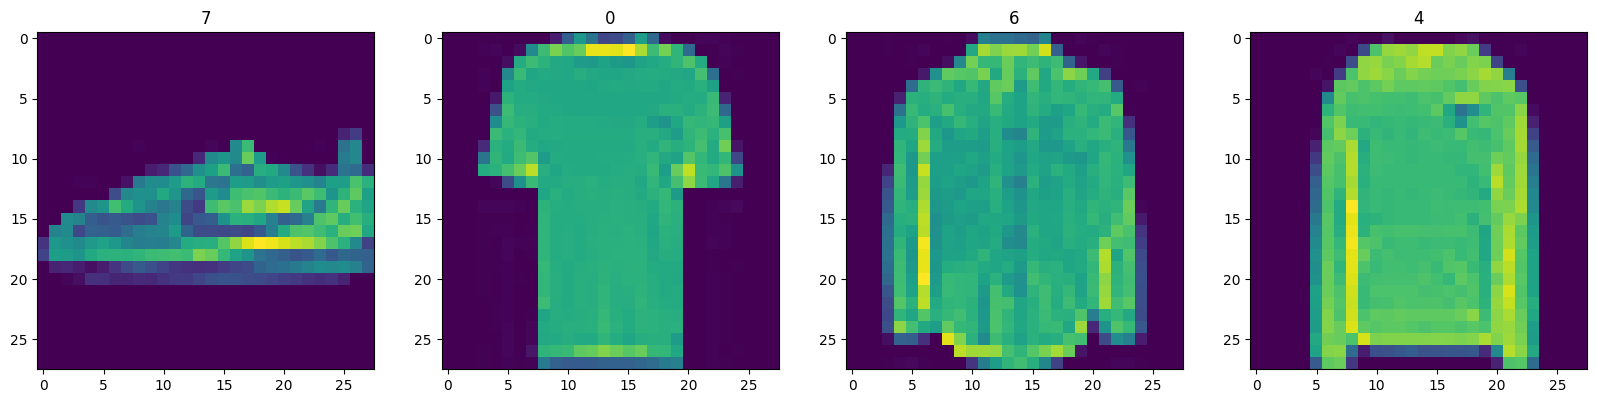

In [48]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx in range(4):
    batch=iterator.next()
    ax[idx].imshow(np.squeeze(batch['image'])) #np.squeeze is used to represent the image arrays horizontally instead of vertically
    ax[idx].title.set_text(batch['label']) #the labels are set as titles for the subplots so that we can understand which class it belongs to

In [51]:
def scale_image(data):
    image=data['image']
    return image/255

In [52]:
ds=tfds.load('fashion_mnist',split='train') #reloading the dataset
#Note that we can use the previous dataset variable to perform preprocessing.
#The process includes:
#mapping the scale function, caching, shuffling the images, batch size and prefetching the images

ds=ds.map(scale_image)
ds=ds.cache()
ds=ds.shuffle(60000)
ds=ds.batch(128) #batch size of 128
ds=ds.prefetch(64) #Reduce the possibility of bottleneck



In [54]:
ds.as_numpy_iterator().next().shape #we can see that batch size is 128

(128, 28, 28, 1)

# Neural Network

In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D

## Building the generator

In [90]:
def build_generator():
    model=Sequential()
    # Takes in random values and reshapes into 7*7*128
    model.add(Dense(7*7*128,input_dim=128))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((7,7,128)))

    #Upsampling block 1
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))

    #Upsampling block 2
    model.add(UpSampling2D())
    model.add(Conv2D(128,5,padding='same'))
    model.add(LeakyReLU(0.2))

    #Downsampling block 1
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    #Downsampling block 2
    model.add(Conv2D(128,4,padding='same'))
    model.add(LeakyReLU(0.2))

    #Conv layer to get one channel
    model.add(Conv2D(1,4,padding='same',activation='sigmoid'))
    
    return model

In [91]:
generator=build_generator()

In [92]:
generator.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 6272)              809088    
                                                                 
 leaky_re_lu_33 (LeakyReLU)  (None, 6272)              0         
                                                                 
 reshape_10 (Reshape)        (None, 7, 7, 128)         0         
                                                                 
 up_sampling2d_14 (UpSampli  (None, 14, 14, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 128)       409728    
                                                                 
 leaky_re_lu_34 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                     

1/1 [==============================] - 0s 83ms/step


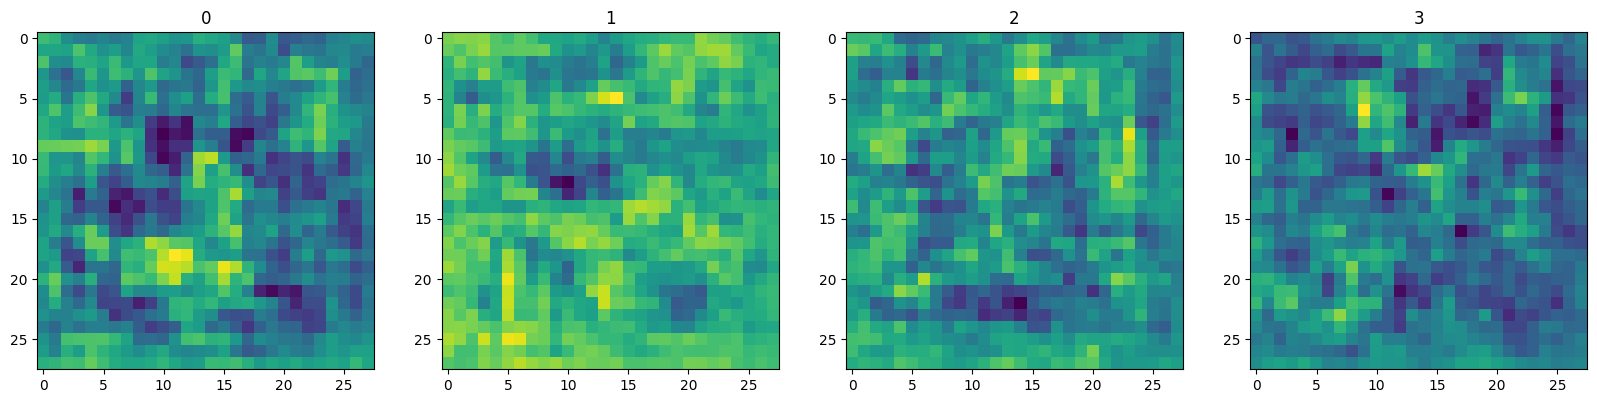

In [99]:
img=generator.predict(np.random.randn(4,128,1))
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(img):
    ax[idx].imshow(np.squeeze(img)) #np.squeeze is used to represent the image arrays horizontally instead of vertically
    ax[idx].title.set_text(idx) #the labels are set as titles for the subplots so that we can understand which class it belongs to

## Building the discriminator

In [113]:
def build_discriminator():
    model=Sequential()

    model.add(Conv2D(32,5,input_shape=(28,28,1)))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(64,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(128,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Conv2D(256,5))
    model.add(LeakyReLU(0.2))
    model.add(Dropout(0.4))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1,activation='sigmoid'))
    
    return model
    

In [114]:
discriminator=build_discriminator()
discriminator.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 leaky_re_lu_47 (LeakyReLU)  (None, 24, 24, 32)        0         
                                                                 
 dropout_9 (Dropout)         (None, 24, 24, 32)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 20, 20, 64)        51264     
                                                                 
 leaky_re_lu_48 (LeakyReLU)  (None, 20, 20, 64)        0         
                                                                 
 dropout_10 (Dropout)        (None, 20, 20, 64)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 16, 16, 128)     

In [117]:
img=generator.predict(np.random.randn(4,128,1))

1/1 [==============================] - 0s 87ms/step


In [118]:
img.shape

(4, 28, 28, 1)

In [119]:
discriminator.predict(img)

1/1 [==============================] - 0s 137ms/step


array([[0.5048406 ],
       [0.5047083 ],
       [0.50483626],
       [0.5047946 ]], dtype=float32)

# Custom training loop

In [121]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy


The learning rate for the generator must be faster than the discriminator because we need the discriminator to not go too fast 

In [122]:
g_opt=Adam(learning_rate=0.0001)
d_opt=Adam(learning_rate=0.00001)


In [124]:
g_loss=BinaryCrossentropy()
d_loss=BinaryCrossentropy()

In [125]:
from tensorflow.keras.models import Model


In [128]:
class FashionGAN(Model):
    def __init__(self,generator,discriminator,*args,**kwargs):
        super().__init__(*args,**kwargs)

        #Creating attributes for generator and discriminator
        self.generator=generator
        self.discriminator=discriminator
    def train_step(self,batch):
        real_imgs=batch
        fake_imgs=self.generator(tf.random.normal((128,128,1)),training=False)
        #Training the discriminator
        with tf.GradientTape() as d_tape:
            #Pass the real and fake images to the discriminator model
            yhat_real=self.discriminator(real_imgs,training=True)
            yhat_fake=sef.discriminator(fake_imgs,training=True)
            yhat_realfake=tf.concat([yhat_real,yhat_fake],axis=0)
            
        #Create labels for real and fake images
        y_realfake=tf.concat([tf.zeros_like(yhat_real),tf.ones_like(yhat_fake)],axis=0)
        #Add some noise to the outputs
        #Calculate the loss
        #Apply back propogation
    def compile(self,g_opt,d_opt,g_loss,d_loss,*args,**kwargs):
        #Compile with base class
        super().compile(*args,**kwargs)

        #Create attributes for loss and optimizers
        self.g_opt=g_opt
        self.d_opt=d_opt
        self.g_loss=g_loss
        self.d_loss=d_loss
        
        pass
    def test_step(self):
        pass